Проект: Линейные модели в машинном обучении
Шаг 1: загрузка и изучение данных
- загрузка данных в датафреймы pandas
- изучение данных
Шаг 2: Предобработка данных
- проверка данных на наличие пропусков и дубликатов
- проверка корректности типов данных
Шаг 3: Исследовательский анализ данных
- статистический анализ всех признаков
- построение графиков для каждого признака
- выводы о данных (выбросы, необычное распределение количественных признаков или другие особенности)
- рекомендации по улучшению данных
Шаг 4: Корреляционный анализ признаков в датасете ferma_main.csv
- изучение взаимосвязей между признаками: рассчет коэффициентов корреляции между всеми признаками
- построение диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков
- выводы о взаимосвязи признаков: определение типа взаимосвязи между целевым и входными признаками. Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть? Проверка мультиколлинеарности между входными признаками
Шаг 5: Задача регрессии
1. подготовка данных датасета ferma_main.csv и обучение на нем первой модели LinearRegression
- в качестве целевого признака используем "Удой, кг"
- отбор признаков, которые подходят для модели линейной регрессии. Аргументация выбора
- разбиение данных на тренировочную и тестовые выборки
- кодирование категориальные признаков с помощью OneHotEncoder
- масштабирование количественных признаков с помощью StandardScaler
- обучение модели линейной регрессии на подготовленных данных
- оценка качества модели на тестовой выборке: рассчет R², анализ остатков с помощью графиков
- выводы: значение R² модели, анализ остатков с помощью графиков
2. Подготовка данных с учётом связи входных признаков с целевым и обучение на них второй модели LinearRegression
- анализ диаграмм рассеяния, на их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами, устранение нелинейности
- исключение нелинейности между ЭКЕ и Удой
- повторение шагов из пункта 1 и создание второй модели: подготовка данных, обучение модели, оценка её качества и выводы
3. Добавление в данные новый признак и обучение на них третьей модели LinearRegression
- добавление признака "Имя Папы" из файла ferma_dad.csv, соединение его с остальными данными ferma_main.csv по ключу
- устранение нелинейности между признаками
- повторение шагов из пункта 1 и создание третьей модели: подготовка данных, обучение модели, оценка её качевтва и выводы
4. Сравнение качества трех моделей линейной регрессии, сопоставление их R² и остатков
5. Оценка качества каждой модели по трём метрикам: MSE, MAE, RMSE
- выбор лучше модели
- указание доверительного интервала прогноза лучшей модели, рассчет квантилей ошибки модели на тренировочных данных
6. Прогнозирование удоя коров, которых фермер хочет купить
- добавление недостающих признаков "ЭКЕ (Энергетическая кормовая единица)", "Сырой протеин, г" и "СПО (Сахаро-протеиновое соотношение)"
- подготовка данных
- получение прогноза удоя коров
Шаг 6: Задача классификации
1. Подготовка данных датасета ferma_main.csv и обучение на них модели LogisticRegression
- в качестве целевого признака используем "Вкус молока"
- преобразование имеющихся или добавление новых признаков при необходимости
- разбиение данных на тренировочную и тестовую выборки
- кодирование категориальных признаков с помощью OneHotEncoder
- мастабирование количественных признаков с помощью StandardScaler
- обучение модели логистической регрессии на подготовленных данных
- оценка качества модели на тестовой выборке: рассчет метрик accuracy, recall, precision
- построение матрицы ошибок
2. Анализ модели логистической регрессии
- объяснение, какая ошибка критичнее всего при покупке коров: первого или второго рода. Формулировка ответа с учётом метрик recall и precision и выбор наиболее важной из них
- выводы: что нужно сделать дальше, исходя из анализа модели?
3. С помощью обученной модели, прогнозирование вкуса молока коров, которых фермер хочет купить
- подготовка данных
- прогноз вкуса молока коров
Шаг 7: Итоговые выводы
- добавление прогноза вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер
- отбор коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко
- описание результатов работы моделей для фермера: Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему? Какие ещё рекомендации можно ему дать?
- выводы о моделях линейной регрессии и логистической регрессии: способы улучшения качества регрессионной модели. Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему? Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

Шаг 1: загрузка и изучение данных
Загрузка данных

In [1]:
!pip install phik -q

In [2]:
!pip install scikit-learn==1.5.0 -q

In [3]:
#импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
from math import sqrt
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import binom, norm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [4]:
!pip install scikit-learn

In [5]:
#загрузим и прочитаем датайрейм ferma_main.csv
try:
    ferma_main = pd.read_csv('C:/Users/user/Downloads/ferma_main.csv', sep = ';')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')

In [6]:
#загрузим и прочитаем датайрейм ferma_dad.csv
try:
    ferma_dad = pd.read_csv('C:/Users/user/Downloads/ferma_dad.csv', sep = ';')
except:
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')

In [7]:
#загрузим и прочитаем датайрейм cow_buy.csv
try:
    cow_buy = pd.read_csv('C:/Users/user/Downloads/cow_buy.csv', sep = ';')
except:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [8]:
#выведем первые 5 строк о датафрейма ferma_main
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


Некоторые столбцы не соответствуют правилам хорошего стиля, переименуем их

In [9]:
ferma_main.rename(columns = {'Удой, кг' : 'удой_кг', 'ЭКЕ (Энергетическая кормовая единица)':'эке', 'Сырой протеин, г' : 'сырой_протеин_г', 'СПО (Сахаро-протеиновое соотношение)':'спо', 'Порода' : 'порода', 'Тип пастбища' : 'тип_пастбища', 'порода папы_быка' : 'порода_папы_быка', 'Жирность,%' : 'жирность_%', 'Белок,%' : 'белок_%', 'Вкус молока' : 'вкус_молока', 'Возраст' : 'возраст'}, inplace = True)

Также необходимо заменить количественные значения столбцов 'эке', 'спо', 'жирность_%', 'белок_%', чтобы в них не было ","

In [10]:
for i in ['эке', 'спо', 'жирность_%', 'белок_%']:
    ferma_main[i] = ferma_main[i].str.replace(',','.')
ferma_main.head()  

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.4,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [11]:
#выведем первые 5 строк о датафрейма ferma_dad
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Переименуем столбец "Имя Папы"  в соответствии с правилами хорошего стиля

In [12]:
ferma_dad.rename(columns = {'Имя Папы' : 'имя_папы'}, inplace = True)

In [13]:
ferma_dad.head() #проверим

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [14]:
#выведем первые 5 строк о датафрейма cow_buy
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Так же как и в 2 предыдущих датасетах, переименуем столбцы в соответствии с правилами хорошего стиля

In [15]:
cow_buy.rename(columns = {'Порода' : 'порода', 'Тип пастбища' : 'тип_пастбища', 'порода папы_быка' : 'порода_папы_быка', 'Текущая_жирность,%' : 'текущая_жирность_%', 'Текущий_уровень_белок,%' : 'текущий_уровень_белок_%', 'Возраст' : 'возраст', 'Имя_папы' : 'имя_папы'}, inplace = True)

Также необходимо избавиться от "," в столбцах текущая_жирность_%, текущий_уровень_белок_%, заменив запятые на "."

In [16]:
for i in ['текущая_жирность_%', 'текущий_уровень_белок_%']:
    cow_buy[i] = cow_buy[i].str.replace(',','.')
cow_buy.head()  

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Выводы по первому шагу: загрузи и прочитали данные. Наименования столбцов не соответствовали правилам хорошего стиля, исправили их, переименовав столбцы. Избавились от "," в числовых значениях первого и третьего датафрейма

Шаг 2: Предобработка данных

Проверка данных на наличие пропусков и дубликатов

Начнем работу с первым датасетом ferma_main

In [17]:
#сначала изучим общую информацию о датафрейме
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой_кг           634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой_протеин_г   634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип_пастбища      634 non-null    object
 7   порода_папы_быка  634 non-null    object
 8   жирность_%        634 non-null    object
 9   белок_%           634 non-null    object
 10  вкус_молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [18]:
#не у всех данных корректный тип. Необходимо изменить тип данных у столбца эке с object на float, спо с object на float,
#жирность_% с object на float, белок_% с object на float

In [19]:
ferma_main['эке'] = ferma_main['эке'].astype(float)
ferma_main['спо'] = ferma_main['спо'].astype(float)
ferma_main['жирность_%'] = ferma_main['жирность_%'].astype(float)
ferma_main['белок_%'] = ferma_main['белок_%'].astype(float)

In [20]:
ferma_main.info() #проверим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой_кг           634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой_протеин_г   634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип_пастбища      634 non-null    object 
 7   порода_папы_быка  634 non-null    object 
 8   жирность_%        634 non-null    float64
 9   белок_%           634 non-null    float64
 10  вкус_молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Проверим данные датафрейма ferma_main на наличие пропусков и дубликатов

In [21]:
ferma_main.isna().sum()

id                  0
удой_кг             0
эке                 0
сырой_протеин_г     0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность_%          0
белок_%             0
вкус_молока         0
возраст             0
dtype: int64

пропущенных значений нет

In [22]:
ferma_main.duplicated().sum()

5

в датафрейме встречаются 5 дубликатов, избавимся от них

In [23]:
ferma_main = ferma_main.drop_duplicates()

Далее посмотрим уникальные значени столбцов порода, тип_пастбища, порода_папы_быка, вкус_молока, возраст

In [24]:
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [25]:
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [26]:
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [27]:
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [28]:
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

В столбце порода_папы_быка наблюдаются неявные дубликаты (Айдиал и Айдиалл)
В столбце тип_пастбища также они есть (Равнинное и Равнинные)
Это может быть связано с человеческим фактором.
Избавимся от неявных дубликатов

In [29]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные','Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл','Айдиал')

In [30]:
ferma_main['порода_папы_быка'].unique() #проверим

array(['Айдиал', 'Соверин'], dtype=object)

In [31]:
ferma_main['тип_пастбища'].unique() #проверим

array(['Равнинное', 'Холмистое'], dtype=object)

Далее поработаем со вторым датайреймом ferma_dad

In [32]:
ferma_dad.info() #проверим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Типы столбцов оставим без изменений, тут проблем нет

Проверим данные датафрейма ferma_dad на наличие пропусков и дубликатов

In [33]:
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

пропущенных значений нет

In [34]:
ferma_dad.duplicated().sum()

0

Явных дубликатов нет

Посмотрим уникальные значения столбца "имя_папы"

In [35]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Неявных дубликатов нет. Осталось проверить третий датафрейм cow_buy

In [36]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность_%       20 non-null     object
 5   текущий_уровень_белок_%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Заменим тип данных в столбцах "текущая_жирность_%" с object на float, текущий_уровень_белок_% с object на float

In [37]:
cow_buy['текущая_жирность_%'] = cow_buy['текущая_жирность_%'].astype(float)
cow_buy['текущий_уровень_белок_%'] = cow_buy['текущий_уровень_белок_%'].astype(float)

In [38]:
cow_buy.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность_%       20 non-null     float64
 5   текущий_уровень_белок_%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Проверим данные датафрейма cow_buy на наличие пропусков и дубликатов

In [39]:
cow_buy.isna().sum()

порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белок_%    0
возраст                    0
dtype: int64

Пропусков нет

In [40]:
cow_buy.duplicated().sum()

4

В датафрейме есть 4 явных дубликата, избавимся от них. Избавляться от них не будем, поскольку это тестовая выбока

Далее проверим уникальные значения столбцов 'порода', 'тип_пастбища', 'порода_папы_быка' на наличие неявных дубликатов

In [41]:
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [42]:
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [43]:
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

Неявных дубликатов нет

Выводы по шагу 2: Предобработка данных:
- в датафрейме ferma_main изменить тип данных у столбца эке с object на float, спо с object на float, жирность_% с object на float, белок_% с object на float
- в датафрейме ferma_main встречаются 5 дубликатов, избавились от них, пропусков нет
- в столбцах датафрейма ferma_main "порода_папы_быка" наблюдаются неявные дубликаты (Айдиал и Айдиалл). В столбце "тип_пастбища" также они есть (Равнинное и Равнинные), избавились от них
- в датафрейме ferma_dad явных дубликатов нет, также нет неявных дубликатов, типы столбцов не изменяли, пропусков нет
- в датафрейме cow_buy заменили тип данных в столбцах "текущая_жирность_%" с object на float, текущий_уровень_белок_% с object на float
- пропусков в датафрейме cow_buy нет
- в датафрейме cow_buy избавилсь от 4 явных дубликатов, неявных дубликатов нет

Шаг 3: Исследовательский анализ данных

Проведем статистический анализ всех признаков

Начнем работу с первого датафрейма ferma_main

In [44]:
ferma_main.head() #выведем первые 5 строк датафрейма

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [45]:
ferma_main.describe().round(2) #проведем статистическую сводку набора данных ferma_main

,id,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
count,629.00,629.00,629.00,629.00,629.00,629.00,629.00
mean,315.00,6188.75,14.54,1923.36,0.91,3.60,3.08
std,181.72,1644.80,1.31,182.96,0.03,0.17,0.00
min,1.00,5204.00,10.90,1660.00,0.84,2.99,3.07
25%,158.00,5751.00,13.50,1771.00,0.89,3.59,3.07
50%,315.00,6133.00,14.70,1888.00,0.93,3.65,3.08
75%,472.00,6501.00,15.60,2062.00,0.94,3.72,3.08
max,629.00,45616.00,16.80,2349.00,0.96,3.75,3.08


Теперь построим графики для каждого признака

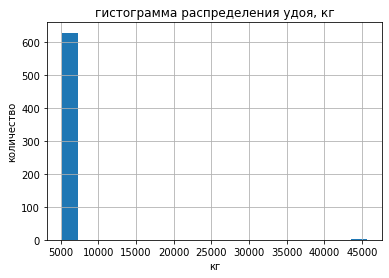

In [46]:
#начнем с удой_кг
ferma_main['удой_кг'].hist(bins=20)
plt.title('гистограмма распределения удоя, кг')
plt.xlabel('кг')
plt.ylabel('количество')
plt.show()

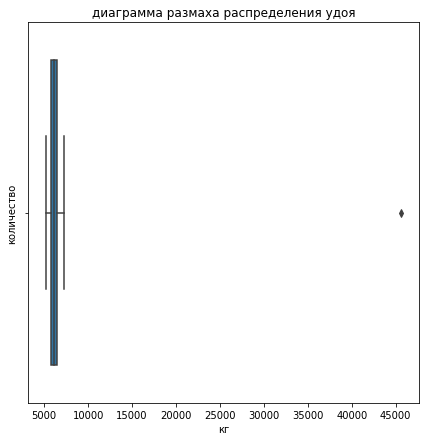

In [47]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=ferma_main, x='удой_кг')
plt.title('диаграмма размаха распределения удоя')
plt.xlabel('кг')
plt.ylabel('количество')
plt.show()

Из гистораммы распределения и диаграммы размаха распределения удоя явно видно выброс в значении 45000 кг, что выглядит нереалистично. Для дальнейшей работы, необходимо от него избавиться

In [48]:
ferma_main = ferma_main[ferma_main['удой_кг'] < 45000]

Снова построим графики распределения удоя 

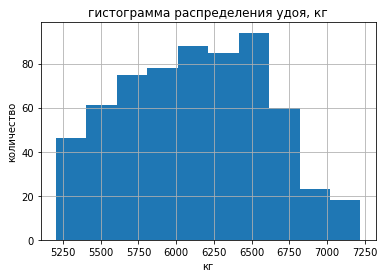

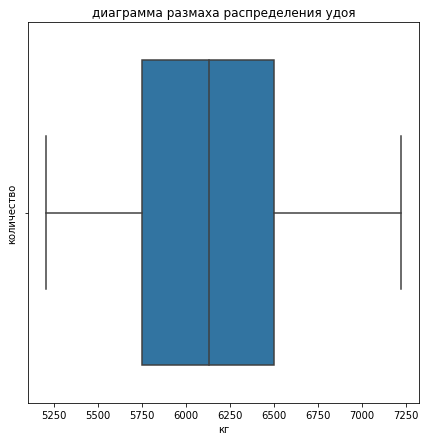

In [49]:
ferma_main['удой_кг'].hist(bins=10)
plt.title('гистограмма распределения удоя, кг')
plt.xlabel('кг')
plt.ylabel('количество')
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=ferma_main, x='удой_кг')
plt.title('диаграмма размаха распределения удоя')
plt.xlabel('кг')
plt.ylabel('количество')
plt.show()

Из гистограммы видно, что распределение носит нормальный характер, медианное значение по данному столбцу 6132.50 кг, первый квартиль 5749.75кг, второй 6501.00кг 

Далее поработаем со столбцом "эке"

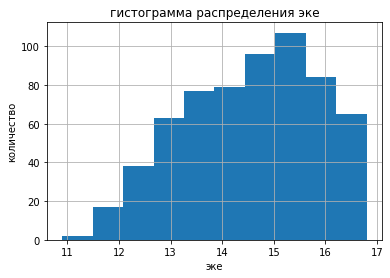

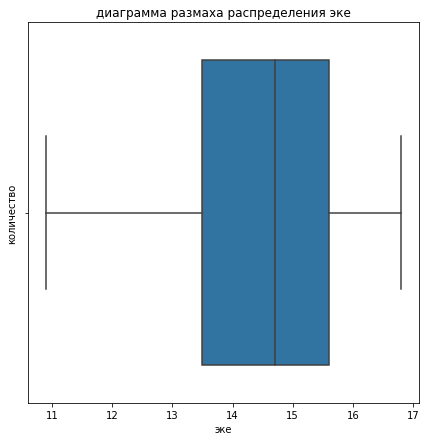

In [50]:
ferma_main['эке'].hist(bins=10)
plt.title('гистограмма распределения эке')
plt.xlabel('эке')
plt.ylabel('количество')
plt.figure(figsize=(7,7))
ax = sns.boxplot(data=ferma_main, x='эке')
plt.title('диаграмма размаха распределения эке')
plt.xlabel('эке')
plt.ylabel('количество')
plt.show()

Из гистораммы видно, что распределение эке носят нормальный характер, медианное значение по данному столбцу 14.70, первый квартиль 13.50	, второй 15.60 

Далее поработаем со столбцом сырой_протеин_г

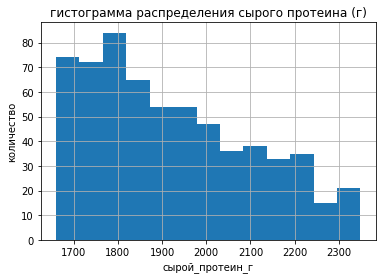

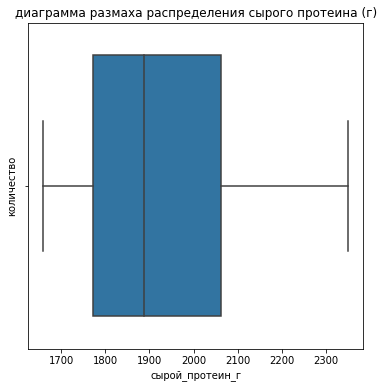

In [51]:
ferma_main['сырой_протеин_г'].hist(bins=13)
plt.title('гистограмма распределения сырого протеина (г)')
plt.xlabel('сырой_протеин_г')
plt.ylabel('количество')
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=ferma_main, x='сырой_протеин_г')
plt.title('диаграмма размаха распределения сырого протеина (г)')
plt.xlabel('сырой_протеин_г')
plt.ylabel('количество')
plt.show()

Из гистограммы видно, что распределение сырого протеина носит нормальный характер, медианное значение по данному столбцу 1888.00г, первый квартиль 1771.75г, второй 2062.25г

Построим графики и проанализируем распределение столбца спо

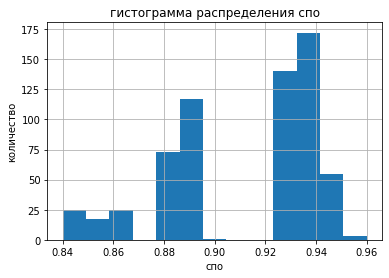

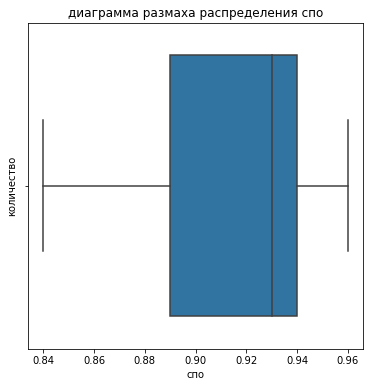

In [52]:
ferma_main['спо'].hist(bins=13)
plt.title('гистограмма распределения спо')
plt.xlabel('спо')
plt.ylabel('количество')
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=ferma_main, x='спо')
plt.title('диаграмма размаха распределения спо')
plt.xlabel('спо')
plt.ylabel('количество')
plt.show()

Визуально, гистограмма распределения спо не носит нормальный характер, медианное значение по данному показателю 0.93, первый квартиль 0.89, второй квартиль 0.94

Проанализируем аналогичным образом столбец "жирность_%"

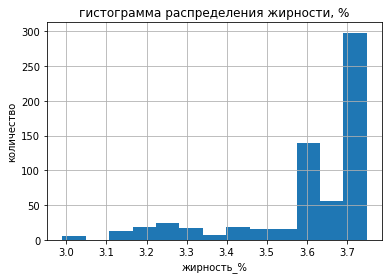

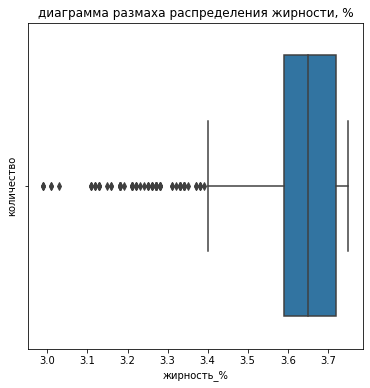

In [53]:
ferma_main['жирность_%'].hist(bins=13)
plt.title('гистограмма распределения жирности, %')
plt.xlabel('жирность_%')
plt.ylabel('количество')
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=ferma_main, x='жирность_%')
plt.title('диаграмма размаха распределения жирности, %')
plt.xlabel('жирность_%')
plt.ylabel('количество')
plt.show()

Гистограмма распределения жирности не носит нормальный характер. На диаграмме размаха, казалось бы, наблюдаются выбросы, однако процентное соотношение жирности 3-3,4% имеет место на существование, поскольку такая жирность молока в действительности существует, поэтому избавляться от этих значений не будем. Медиана 3.65%, первый квартиль 3.59%, второй квартиль 3.72%.

Проанализируем столбец "белок_%"

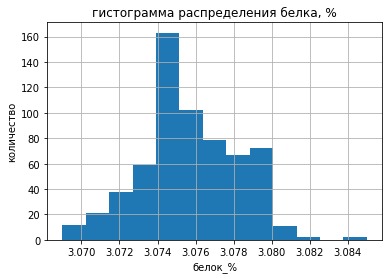

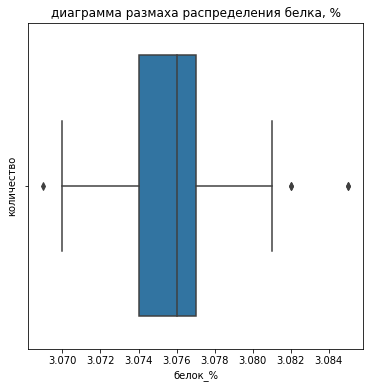

In [54]:
ferma_main['белок_%'].hist(bins=13)
plt.title('гистограмма распределения белка, %')
plt.xlabel('белок_%')
plt.ylabel('количество')
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=ferma_main, x='белок_%')
plt.title('диаграмма размаха распределения белка, %')
plt.xlabel('белок_%')
plt.ylabel('количество')
plt.show()

Гистограмма распределения белка носит нормальный характер, в диаграмме размаха наблюдаются выбросы, однако они несильно отличаются от медианного значения, избавляться от них не будем. Медианное значение показателя 3.08%, первый квартиль 3.07%, второй квартиль 3.08%.

Проведем анализ столбца "вкус_молока"

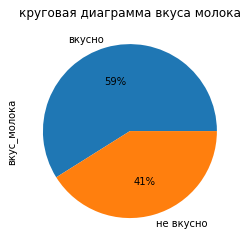

In [55]:
ferma_main['вкус_молока'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'круговая диаграмма вкуса молока')
plt.show()

Из диаграммы видно, что 59% молока вкусное, 41% не вкусное

Проанализируем столбец "возраст"

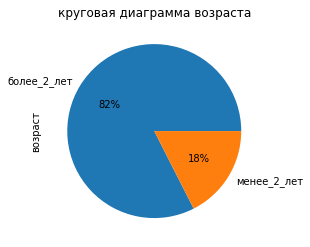

In [56]:
ferma_main['возраст'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'круговая диаграмма возраста')
plt.show()

82% коров имеют возраст более 2 лет, 18% менее 2 лет

Далее проведем аналогичный анализ по всем признакам у второго датафрейма ferma_dad

In [57]:
ferma_dad.head() #выведем первые 5 строк датафрейма

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [58]:
ferma_dad['имя_папы'].unique() #посмотрим уникальные значения столбца имя_папы

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

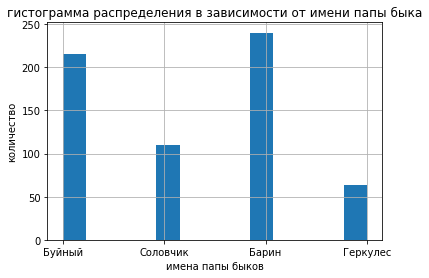

In [59]:
ferma_dad['имя_папы'].hist(bins=13)
plt.title('гистограмма распределения в зависимости от имени папы быка')
plt.xlabel('имена папы быков')
plt.ylabel('количество')
plt.show()

График не выгляит достаточно информативным, построим круговую диаграмму распределения имен отцов быков в процентном соотношении

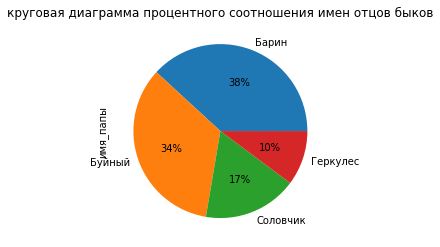

In [60]:
ferma_dad['имя_папы'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'круговая диаграмма процентного соотношения имен отцов быков')
plt.show()

Из круговой диаграммы видно,что самое популярное имя у отцов быков "Барин" - 38%, далее "Буйный" 34%, Соловчик 17% и Геркулес 10%

Проведем анализ у третьего датафрейма cow_buy

In [61]:
cow_buy.head() #выведем первые 5 строчек датафрейма

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Сделаем распределение по породе

In [62]:
#выведем уникальные значения столбца "порода"
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

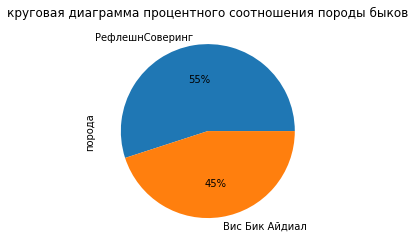

In [63]:
#круговая диаграмма показывает большую информативность, поэтому сразу будем работать с ней
cow_buy['порода'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'круговая диаграмма процентного соотношения породы быков')
plt.show()

Из круговоц диаграммы процентного соотношения породы быков видно, что породы "Вис Бик Айдиал" и "РефлешнСоверинг" распределены поровну

Сделаем распределение по столбцу "тип_пастбища"

In [64]:
#выведем уникальные значения столбца тип_пастбища
cow_buy['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [65]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


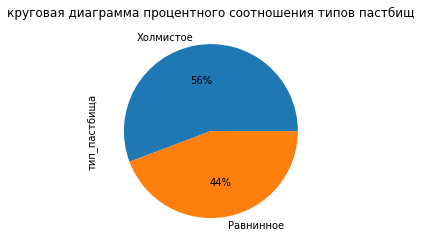

In [66]:
#воспользуемся также круговой диаграммой
ferma_main['тип_пастбища'].value_counts().plot(y = 'count', kind = 'pie', autopct='%1.0f%%', title = 'круговая диаграмма процентного соотношения типов пастбищ')
plt.show()

Холмистых пастбищ больше - 56%.

Выводы по исследовательскому анализу данных:
1. Провели статистический анализ всех признаков
2. Для каждого признака построены графики (для количественных гистограммы, для категориальных круговые диаграммы)
3. Из гистораммы распределения и диаграммы размаха распределения удоя явно видно выброс в значении 45000 кг, что выглядит нереалистично. Избавились от него. Распределение носит нормальный характер, медианное значение по данному столбцу 6132.50 кг, первый квартиль 5749.75кг, второй 6501.00кг
4. Распределение эке носят нормальный характер, медианное значение по данному столбцу 14.70, первый квартиль 13.50 , второй 15.60, выбросов нет
5. Распределение сырого протеина носит нормальный характер, медианное значение по данному столбцу 1888.00г, первый квартиль 1771.75г, второй 2062.25г, выбросов нет
6. Распределение спо не носит нормальный характер, медианное значение по данному показателю 0.93, первый квартиль 0.89, второй квартиль 0.94, выбросов нет
7. Распределение жирности не носит нормальный характер. На диаграмме размаха, казалось бы, наблюдаются выбросы, однако процентное соотношение жирности 3-3,4% имеет место на существование, поскольку такая жирность молока в действительности существует, поэтому избавляться от этих значений не будем. Медиана 3.65%, первый квартиль 3.59%, второй квартиль 3.72%.
8. Распределение белка носит нормальный характер, в диаграмме размаха наблюдаются выбросы, однако они несильно отличаются от медианного значения, принято решение не избавляться от них. Медианное значение показателя 3.08%, первый квартиль 3.07%, второй квартиль 3.08%.
9. 59% молока вкусное, 41% не вкусное
10. 82% коров имеют возраст более 2 лет, 18% менее 2 лет
11. Самое популярное имя у отцов быков "Барин" - 38%, далее "Буйный" 34%, Соловчик 17% и Геркулес 10%
12. Породы "Вис Бик Айдиал" и "РефлешнСоверинг" распределены поровну (по 50%)
13. Холмистых пастбищ больше - 56%.

Шаг 4: Корреляционный анализ признаков в датасете ferma_main.csv

Не все данные имеют нормальное распределение, для корреляционного анализа воспользуемся методом корреляции Спирмена

In [67]:
ferma_main.head() #для удобства дальнейшей работы выведем первые 5 строк датафрейма

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [68]:
ferma_main[['удой_кг', 'эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']].corr(method="spearman").round(3)

,удой_кг,эке,сырой_протеин_г,спо,жирность_%,белок_%
удой_кг,1.000,0.765,0.438,0.788,0.689,-0.006
эке,0.765,1.000,0.385,0.742,0.687,-0.013
сырой_протеин_г,0.438,0.385,1.000,0.486,0.393,0.229
спо,0.788,0.742,0.486,1.000,0.701,0.110
жирность_%,0.689,0.687,0.393,0.701,1.000,0.043
белок_%,-0.006,-0.013,0.229,0.110,0.043,1.000


Создадим два новых датафрейма, один с количественными признаками, второй с категориальными

In [69]:
colich = ['эке', 'сырой_протеин_г', 'спо', 'жирность_%', 'белок_%']
categorial_col = ['порода', 'тип_пастбища', 'порода_папы_быка', 'вкус_молока', 'возраст']

Построим диаграммы рассеяния между удоем и сырым протеином в зависимости от категориальных признаков. Для упрощения кода, создадим функцию

In [70]:
def scatter_for_udoi(col):
    for i in categorial_col:
        print('Диаграмма рассеяния между удоем и сырым протеном в зависимости от', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'удой_кг', hue = i)
        plt.show() 

Диаграмма рассеяния между удоем и сырым протеном в зависимости от порода


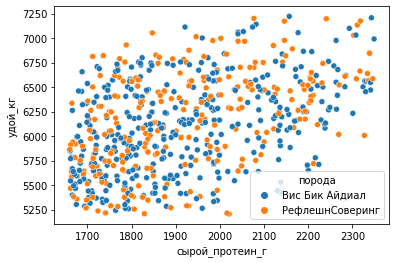

Диаграмма рассеяния между удоем и сырым протеном в зависимости от тип_пастбища


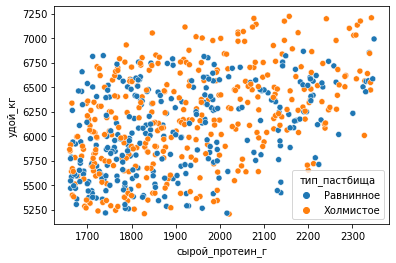

Диаграмма рассеяния между удоем и сырым протеном в зависимости от порода_папы_быка


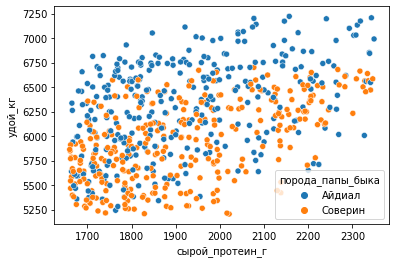

Диаграмма рассеяния между удоем и сырым протеном в зависимости от вкус_молока


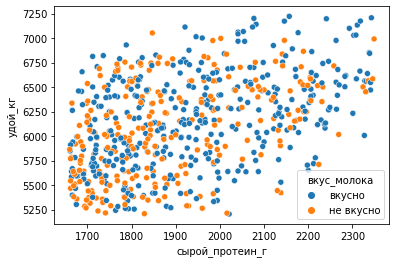

Диаграмма рассеяния между удоем и сырым протеном в зависимости от возраст


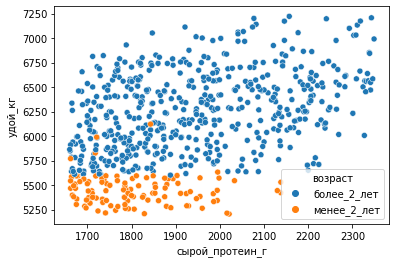

In [71]:
scatter_for_udoi('сырой_протеин_г')

Построим диаграммы рассеяния между удоем и эке в зависимости от категориальных признаков.

In [72]:
def scatter_for_udoi(col):
    for i in categorial_col:
        print('Диаграмма рассеяния между удоем и эке в зависимости от', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'удой_кг', hue = i)
        plt.show() 

Диаграмма рассеяния между удоем и эке в зависимости от порода


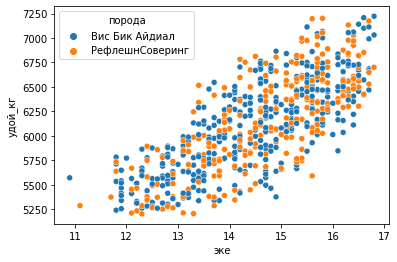

Диаграмма рассеяния между удоем и эке в зависимости от тип_пастбища


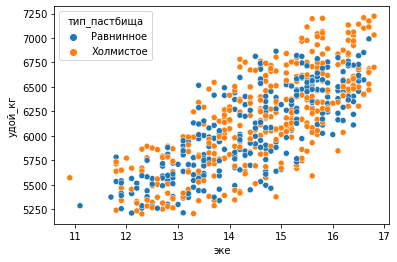

Диаграмма рассеяния между удоем и эке в зависимости от порода_папы_быка


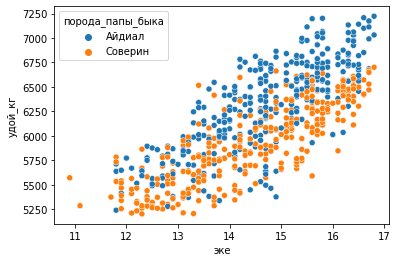

Диаграмма рассеяния между удоем и эке в зависимости от вкус_молока


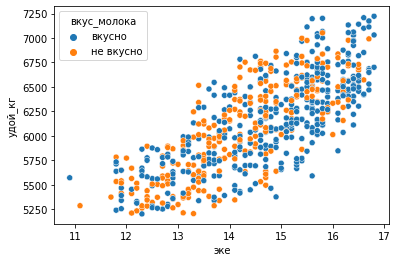

Диаграмма рассеяния между удоем и эке в зависимости от возраст


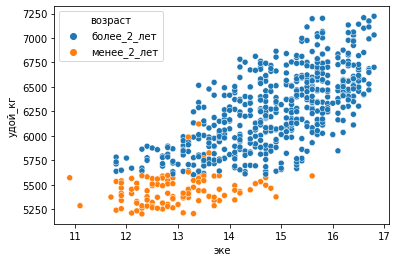

In [73]:
scatter_for_udoi('эке')

Построим диаграммы рассеяния между удоем и спо в зависимости от категориальных признаков.

In [74]:
def scatter_for_udoi(col):
    for i in categorial_col:
        print('Диаграмма рассеяния между удоем и спо в зависимости от', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'удой_кг', hue = i)
        plt.show() 

Диаграмма рассеяния между удоем и спо в зависимости от порода


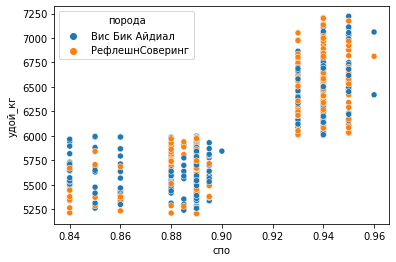

Диаграмма рассеяния между удоем и спо в зависимости от тип_пастбища


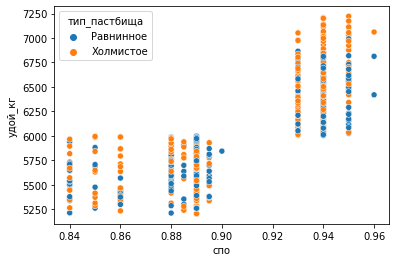

Диаграмма рассеяния между удоем и спо в зависимости от порода_папы_быка


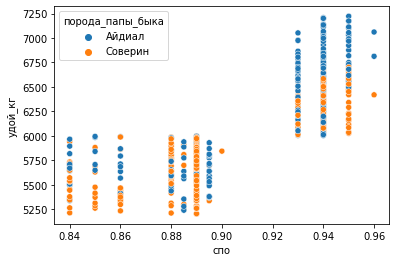

Диаграмма рассеяния между удоем и спо в зависимости от вкус_молока


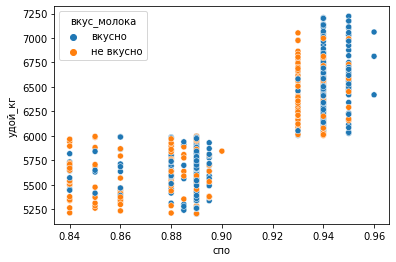

Диаграмма рассеяния между удоем и спо в зависимости от возраст


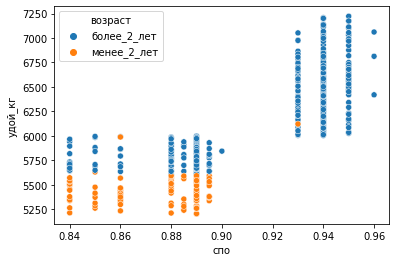

In [75]:
scatter_for_udoi('спо')

Построим диаграммы рассеяния между удоем и жирностью в зависимости от категориальных признаков.

In [76]:
def scatter_for_udoi(col):
    for i in categorial_col:
        print('Диаграмма рассеяния между удоем и жирностью в зависимости от', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'удой_кг', hue = i)
        plt.show() 

Диаграмма рассеяния между удоем и жирностью в зависимости от порода


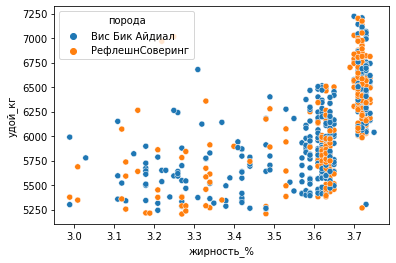

Диаграмма рассеяния между удоем и жирностью в зависимости от тип_пастбища


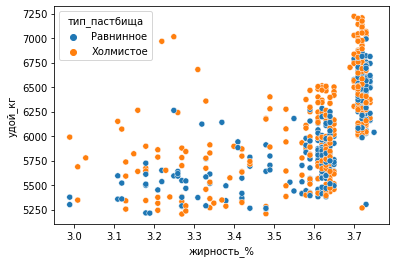

Диаграмма рассеяния между удоем и жирностью в зависимости от порода_папы_быка


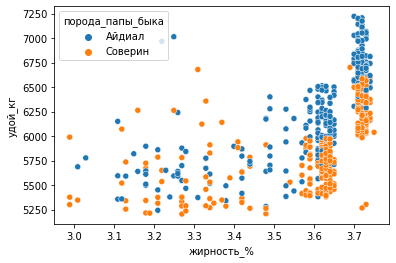

Диаграмма рассеяния между удоем и жирностью в зависимости от вкус_молока


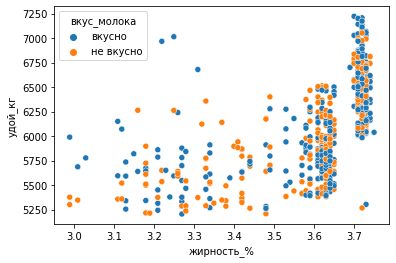

Диаграмма рассеяния между удоем и жирностью в зависимости от возраст


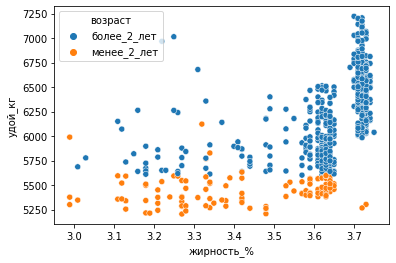

In [77]:
scatter_for_udoi('жирность_%')

Построим диаграммы рассеяния между удоем и белком в зависимости от категориальных признаков.

In [78]:
def scatter_for_udoi(col):
    for i in categorial_col:
        print('Диаграмма рассеяния между удоем и белком в зависимости от', i)
        sns.scatterplot(data = ferma_main, x = col, y = 'удой_кг', hue = i)
        plt.show() 

Диаграмма рассеяния между удоем и белком в зависимости от порода


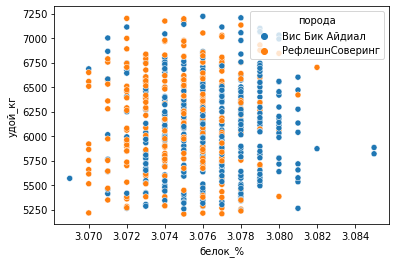

Диаграмма рассеяния между удоем и белком в зависимости от тип_пастбища


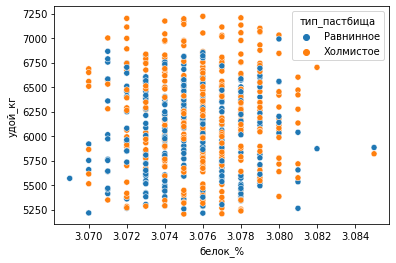

Диаграмма рассеяния между удоем и белком в зависимости от порода_папы_быка


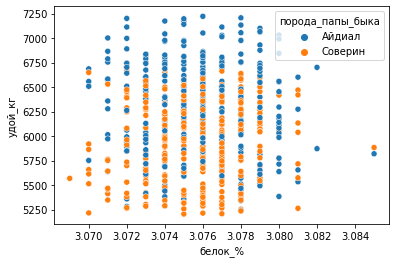

Диаграмма рассеяния между удоем и белком в зависимости от вкус_молока


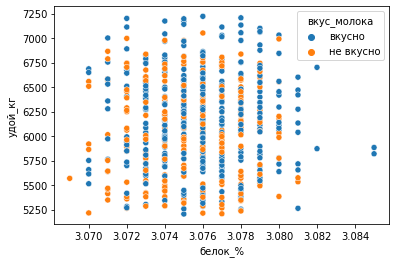

Диаграмма рассеяния между удоем и белком в зависимости от возраст


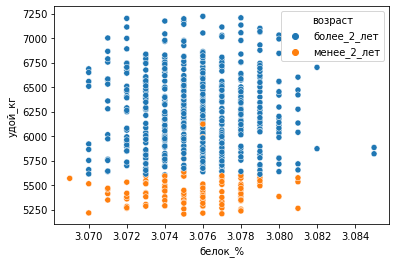

In [79]:
scatter_for_udoi('белок_%')

Выводы:
1. между удоем и эке наблюдается сильная корреляция 0.765
2. между удоем и спо также наблюдается сильная положительная корреляция 0.788, однако зависимость нелинейная
3. между удоем и протеином наблюдается умеренная, но положительная корреляция 0.438
4. между удоем и жирностью наблюдается сильная положительная корреляция 0.689, однако зависимость нелинейная
5. между удоем и белком корреляция практически отсутствует и близка к 0, -0.006, говорить о зависимости нельзя
6. мультиколлинеарность между признаками не наблюдается, поскольку о ней можно судить, когда коэфф корреляции расположен в диапазоне 0.9 - 0.95, тогда как в наших данных таких значений нет.
7. распределение между удоем и сырым протеином не зависит от вкуса молока
8. у породы Айдайл наблюдается большая зависимость между удоем и сырым протеином, а также эке
9. коровы возрастом больше 2 лет дают больше удоя

Шаг 5: Задача регрессии

Подготовим данные датасета ferma_main.csv и обучим модель линейной регрессии

Из категориальных признаком стоит отбросить вкус молока, поскольку на целевой признак удой он не влияет, также уберем жирность и белок

In [80]:
ferma_main.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [81]:
RANDOM_STATE = 42

X = ferma_main.drop('удой_кг', axis=1) #выделим в отдельные переменные входной и целевой признаки
y = ferma_main['удой_кг']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE) #разделили датасет ferma_main на тренировочную и тестовые выборки

In [82]:
!pip install scikit-learn

In [83]:
#создадим списки категориальных и количественных признаков
categorial_col = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
colich_col = ['эке', 'сырой_протеин_г', 'спо']

In [84]:
#закодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[categorial_col])
X_test_ohe = encoder.transform(X_test[categorial_col])

encoder1 = encoder.get_feature_names_out()

In [85]:
#теперь пораотаем с количественными признаками
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train[colich_col])
X_test_scal = scaler.transform(X_test[colich_col])

In [86]:
#соединяем
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder1)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder1)

X_train_scal = pd.DataFrame(X_train_scal, columns = colich_col)
X_test_scal = pd.DataFrame(X_test_scal, columns = colich_col)

X_train = pd.concat([X_train_ohe, X_train_scal], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scal], axis=1)

In [87]:
#обучим модель и сделаем предсказание не тестовых выборках
model_lr1  = LinearRegression()
model_lr1.fit(X_train, y_train)
predictions1 = model_lr1.predict(X_test)

In [88]:
#получим метрику R²
r2 = r2_score(y_test, predictions1)  
print('Значение показателя R2 для первой модели линейной регрессии =', r2)

Значение показателя R2 для первой модели линейной регрессии = 0.7844078173416967


Чем ближе показатель r2 к 1, тем лучше обучена модель и, соотвественно, лучше предсказания. Необходимо улучшить модель

Далее построим гистонрамму распределения остатков и проведем анализ дисперсии

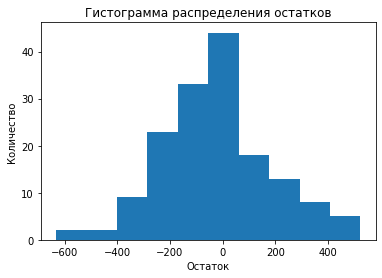

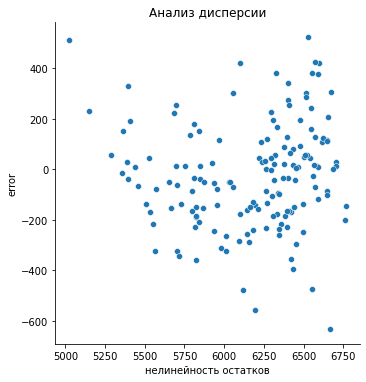

In [89]:
ostatki = pd.DataFrame()
ostatki['true'] = y_test
ostatki['predicted'] = predictions1
ostatki['ostatok'] = ostatki['true'] - ostatki['predicted']
plt.hist(ostatki['ostatok'], bins = 10)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остаток')
plt.ylabel('Количество')
plt.show()
sns.relplot(x = predictions1, y =y_test-predictions1)
plt.xlabel('нелинейность остатков')
plt.ylabel('error')
plt.title('Анализ дисперсии')
plt.show()

Выводы: 
1. Метрика R2 = 0.784, это означает, что точность модели составляет 78%, что немало, но и не много. По хорошему, необходимо улучшать модель, чтобы достичь большей точности и был меньше разброс остатков
2. Из категориальных признаком отбросили вкус молока, поскольку на целевой признак удой он не влияет, также убрали жирность и белок
3. Модель было бы неплохо донастроить, чтобы улучшить распределение остатков, R2 и дисперсию

Далее обучим вторую модель линейной регрессии

Некоторые входные признаки связаны с целевым нелинейно (спо и эке, эке и удой). Необходимо исключить нелинейность, чтобы эти признаки были информативны для линейной регрессии

построим снова гистограмму распределения спо для "наглядности"

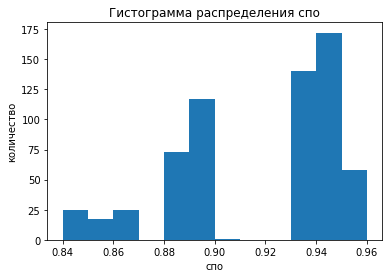

In [90]:
ferma_main['спо'].plot(kind = 'hist', bins=12)
plt.title('Гистограмма распределения спо')
plt.xlabel('спо')
plt.ylabel('количество')
plt.show()

Необходимо преобразовать признак "спо" в категориальный бинарный, в качестве границы будем использовать значение 0.91. Для этого к нашему датафрейму добавим новый столбец "спо_бин" с использованием границы 0.91

In [91]:
ferma_main['спо_бин'] = (ferma_main['спо'] < 0.91).astype('int')

In [92]:
ferma_main.head() #выведем первые 5 строк датафрейма для проверки результата

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1


Теперь уберем нелинейность между признаками эке и удой

Нелинейность между этими признаками исключим, введя новый признак эке_в_квадрате

По аналогии с предыдущим пунктом, добавим в наш датафрейм новый столбец эке_в_квадрате

In [93]:
ferma_main['эке_в_квадрате'] = (ferma_main['эке'] ** 2).astype(int)

In [94]:
ferma_main.head() #выведем первые 5 строк датафрейма для проверки

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163


Вот теперь можно приступать к обучению второй модели линейной регрессии

In [95]:
RANDOM_STATE = 42

X2 = ferma_main.drop('удой_кг', axis=1) #выделим в отдельные переменные входной и целевой признаки
y2 = ferma_main['удой_кг']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=RANDOM_STATE) #разделили датасет ferma_main на тренировочную и тестовые выборки

In [96]:
#создадим списки категориальных и количественных признаков для второй модели
categorial_col2 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'спо', 'возраст']
colich_col2 = ['эке', 'сырой_протеин_г']

In [97]:
#закодируем категориальные признаки
encoder2 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe2 = encoder2.fit_transform(X_train2[categorial_col2])
X_test_ohe2 = encoder2.transform(X_test2[categorial_col2])

encoder2 = encoder2.get_feature_names_out()

In [98]:
#теперь поработаем с количественными признаками второй модели
scaler2 = StandardScaler()
X_train_scal2 = scaler2.fit_transform(X_train2[colich_col2])
X_test_scal2 = scaler2.transform(X_test2[colich_col2])

In [99]:
#соединяем по аналогии с первой моделью
X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns = encoder2)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns = encoder2)

X_train_scal2 = pd.DataFrame(X_train_scal2, columns = colich_col2)
X_test_scal2 = pd.DataFrame(X_test_scal2, columns = colich_col2)

X_train2 = pd.concat([X_train_ohe2, X_train_scal2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scal2], axis=1)

In [100]:
#обучим модель и сделаем предсказание не тестовых выборках второй модели
model_lr2  = LinearRegression()
model_lr2.fit(X_train2, y_train2)
predictions2 = model_lr2.predict(X_test2)

In [101]:
#получим метрику R²
r2_2 = r2_score(y_test2, predictions2)  
print('Значение показателя R2 для второй модели линейной регрессии =', r2_2)

Значение показателя R2 для второй модели линейной регрессии = 0.8144001238007913


Значение показателя R2 выросло с 0.78 до 0.81, что не идеально, но уже лучше. 

Также как и с предыдущем пунктом, построим графики для новой обученной модели

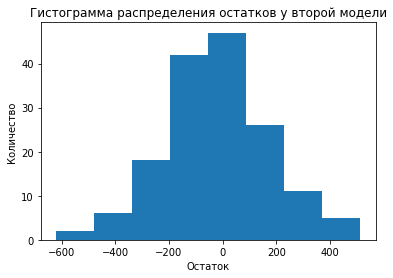

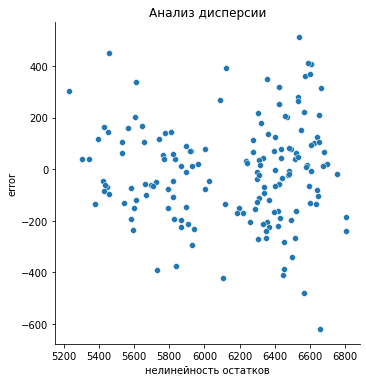

In [102]:
ostatki2 = pd.DataFrame()
ostatki2['true'] = y_test
ostatki2['predicted'] = predictions2
ostatki2['ostatok'] = ostatki2['true'] - ostatki2['predicted']
plt.hist(ostatki2['ostatok'], bins = 8)
plt.title('Гистограмма распределения остатков у второй модели')
plt.xlabel('Остаток')
plt.ylabel('Количество')
plt.show()
sns.relplot(x = predictions2, y =y_test2-predictions2)
plt.xlabel('нелинейность остатков')
plt.ylabel('error')
plt.title('Анализ дисперсии')
plt.show()

Распределение остатков стало больше похоже на нормальное, дисперсия снизилась

Выводы: 
1. убрали нелинейность признаков
2. показатель r2 увеличился на 3%, с с 0.78 до 0.81
3. распределение остатков стало больше похоже на нормальное, дисперсия снизилась

Обучение третьей модели

Добавим признак "имя_папы" из этого датафрейма в датафрейм ferma_main.csv по ключу (id)

In [103]:
ferma_main = pd.merge(ferma_main, ferma_dad, on = 'id')

Обучим на основе этих данных третью модель

In [104]:
ferma_main.head() #для удобства выведем первые 5 строк датафрейма

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163,Барин


In [105]:
RANDOM_STATE = 42

y3 = ferma_main['удой_кг']
X3 = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке', 'спо'], axis = 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=RANDOM_STATE) #разделили датасет ferma_main_with_name на тренировочную и тестовые выборки

In [106]:
#создадим списки категориальных и количественных признаков для третьей модели
categorial_col3 = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_бин', 'имя_папы']
colich_col3 = ['эке_в_квадрате', 'сырой_протеин_г']

In [107]:
#закодируем категориальные признаки
encoder3 = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe3 = encoder3.fit_transform(X_train3[categorial_col3])
X_test_ohe3 = encoder3.transform(X_test3[categorial_col3])

encoder3 = encoder3.get_feature_names_out()

In [108]:
#теперь поработаем с количественными признаками третьей модели
scaler3 = StandardScaler()
X_train_scal3 = scaler3.fit_transform(X_train3[colich_col3])
X_test_scal3 = scaler3.transform(X_test3[colich_col3])

In [109]:
#соединяем
X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns = encoder3)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns = encoder3)

X_train_scal3 = pd.DataFrame(X_train_scal3, columns = colich_col3)
X_test_scal3 = pd.DataFrame(X_test_scal3, columns = colich_col3)

X_train3 = pd.concat([X_train_ohe3, X_train_scal3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scal3], axis=1)

In [110]:
#обучим модель и сделаем предсказание не тестовых выборках третьей модели
model_lr3  = LinearRegression()
model_lr3.fit(X_train3, y_train3)
predictions3 = model_lr3.predict(X_test3)

In [111]:
#получим метрику R²
r2_3 = r2_score(y_test3, predictions3)  
print('Значение показателя R2 для третьей модели линейной регрессии =', r2_3)

Значение показателя R2 для третьей модели линейной регрессии = 0.8244490066176882


Значение показателя R2 стало больше, хоть и не значительно

Построим графики точно также, как и с двумя предыдущими моделями линейной регрессии

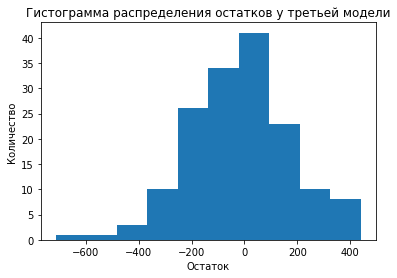

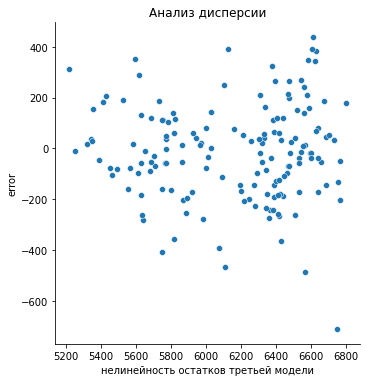

In [112]:
ostatki3 = pd.DataFrame()
ostatki3['true'] = y_test3
ostatki3['predicted'] = predictions3
ostatki3['ostatok'] = ostatki3['true'] - ostatki3['predicted']
plt.hist(ostatki3['ostatok'], bins = 10)
plt.title('Гистограмма распределения остатков у третьей модели')
plt.xlabel('Остаток')
plt.ylabel('Количество')
plt.show()
sns.relplot(x = predictions3, y =y_test3-predictions3)
plt.xlabel('нелинейность остатков третьей модели')
plt.ylabel('error')
plt.title('Анализ дисперсии')
plt.show()

Выводы: 
1. распределение остатков стало ещё чуть больше похоже на нормальное
2. показатель r2 у тертьей модели самый высокий 0.82
3. учитывая вышесказанное, лучшей из всех трех моделей, одназначно, можно признать третью

Оценим качество всех моделей линейной регрессии по трём метрикам: MSE, MAE, RMSE.

In [113]:
print('MSE первой модели равно', mean_squared_error(y_test, predictions1))
print('MSE второй модели равно', mean_squared_error(y_test, predictions2))
print('MSE третьей модели равно', mean_squared_error(y_test, predictions3))

MSE первой модели равно 43887.015009660514
MSE второй модели равно 37781.63220999373
MSE третьей модели равно 35736.03173609137


In [114]:
print('MAE первой модели равно', mean_squared_error(y_test, predictions1, squared = False))
print('MAE второй модели равно', mean_squared_error(y_test, predictions2, squared = False))
print('MAE третьей модели равно', mean_squared_error(y_test, predictions3, squared = False))

MAE первой модели равно 209.4922791170608
MAE второй модели равно 194.37497835368043
MAE третьей модели равно 189.03976231494624


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [115]:
print('RMSE первой модели равно', mean_absolute_error(y_test, predictions1))
print('RMSE второй модели равно', mean_absolute_error(y_test, predictions2))
print('RMSE третьей модели равно', mean_absolute_error(y_test, predictions3))

RMSE первой модели равно 164.24194463474925
RMSE второй модели равно 151.99325845187514
RMSE третьей модели равно 146.30325279856768


Выводы: Одназначно, лучшая модель третья, поскольку показатель r2 у нее выше, а также лучше метрики MSE, MAE, RMSE.

Рассчитаем доверительный интервал моделей

In [116]:
print('доверительный интервал первой модели =',st.norm.interval(confidence=0.95, loc=np.mean(predictions1), scale=st.sem(predictions1)))
print('доверительный интервал второй модели =',st.norm.interval(confidence=0.95, loc=np.mean(predictions2), scale=st.sem(predictions2)))
print('доверительный интервал третьей модели =',st.norm.interval(confidence=0.95, loc=np.mean(predictions3), scale=st.sem(predictions3)))

доверительный интервал первой модели = (6106.009965598841, 6228.04870872839)
доверительный интервал второй модели = (6091.077661922124, 6218.898243573737)
доверительный интервал третьей модели = (6092.458036392902, 6221.42069131005)


Доверительный интервал третьей модели самый большой

Поскольку лучше всего себя показала третья модель, прогноз удоя коров будет делать на её основе

In [117]:
cow_buy.head() #для удобства дальнейшей работы, выведем на экран первые 5 строк датафрейма cow_buy и ferma_main

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [118]:
ferma_main.head()

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163,Барин


Добавим новые признаки в датафрейм cow_buy

In [119]:
cow_buy = cow_buy[cow_buy.columns]

In [120]:
cow_buy = cow_buy.rename(columns={'текущая_жирность_%': 'жирность_%', 'текущий_уровень_белок_%': 'белок_%'})

In [121]:
cow_buy['эке_в_квадрате'] = ferma_main['эке_в_квадрате'].mean()*1.05
cow_buy['спо_бин'] = ferma_main['спо_бин'].mean()*1.05
cow_buy['сырой_протеин_г'] = ferma_main['сырой_протеин_г'].mean()*1.05
cow_buy['удой_кг'] = ferma_main['удой_кг']
cow_buy['id'] = ferma_main['id']
cow_buy['эке'] = ferma_main['эке']
cow_buy['спо'] = ferma_main['спо']
cow_buy['вкус_молока'] = ferma_main['вкус_молока']

In [122]:
RANDOM_STATE = 42

y3 = ferma_main['удой_кг']
X3 = ferma_main.drop(['удой_кг', 'белок_%', 'жирность_%', 'вкус_молока', 'эке', 'спо'], axis = 1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=RANDOM_STATE) 

In [123]:
ferma_main['эке_в_квадрате'].mean()

212.95222929936307

In [124]:
cow_buy['эке_в_квадрате']

0     223.599841
1     223.599841
2     223.599841
3     223.599841
4     223.599841
5     223.599841
6     223.599841
7     223.599841
8     223.599841
9     223.599841
10    223.599841
11    223.599841
12    223.599841
13    223.599841
14    223.599841
15    223.599841
16    223.599841
17    223.599841
18    223.599841
19    223.599841
Name: эке_в_квадрате, dtype: float64

In [125]:
cow_buy.loc[ferma_main['спо_бин']<0.92, ['спо_бин']] = 0
cow_buy.loc[ferma_main['спо_бин']>=0.92, ['спо_бин']] = 1

In [126]:
cow_buy.describe()

,жирность_%,белок_%,эке_в_квадрате,спо_бин,сырой_протеин_г,удой_кг,id,эке,спо
count,20.000000,20.000000,2.000000e+01,20.000000,2.000000e+01,20.00000,20.000000,20.000000,20.000000
mean,3.577500,3.069500,2.235998e+02,0.550000,2.019948e+03,5977.10000,10.700000,14.200000,0.908250
std,0.126818,0.010339,2.916006e-14,0.510418,4.665609e-13,466.22424,6.207805,1.273206,0.021599
min,3.340000,3.046000,2.235998e+02,0.000000,2.019948e+03,5254.00000,1.000000,12.400000,0.885000
25%,3.510000,3.064000,2.235998e+02,0.000000,2.019948e+03,5671.25000,5.750000,13.100000,0.888750
50%,3.590000,3.074000,2.235998e+02,1.000000,2.019948e+03,5902.50000,10.500000,14.200000,0.895000
75%,3.650000,3.076000,2.235998e+02,1.000000,2.019948e+03,6249.50000,15.250000,15.425000,0.930000
max,3.770000,3.081000,2.235998e+02,1.000000,2.019948e+03,6783.00000,21.000000,16.500000,0.940000


In [127]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_в_квадрате,спо_бин,сырой_протеин_г,удой_кг,id,эке,спо,вкус_молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,5863,1,14.2,0.890,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,223.599841,1.0,2019.947532,5529,2,12.8,0.890,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,1.0,2019.947532,5810,3,14.0,0.885,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,223.599841,1.0,2019.947532,5895,4,12.4,0.885,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,1.0,2019.947532,5302,5,12.8,0.885,вкусно
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,223.599841,1.0,2019.947532,5254,6,12.7,0.885,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,5910,7,13.2,0.885,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,223.599841,0.0,2019.947532,6179,8,14.7,0.930,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,0.0,2019.947532,6783,9,14.2,0.940,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,223.599841,1.0,2019.947532,5339,10,13.4,0.895,вкусно


Для дальнейшей работы используем третью модель

In [128]:
X_train = ferma_main
X_test = cow_buy

In [129]:
target = 'удой_кг'
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_бин', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']
X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
model_lr  = LinearRegression()
model_lr.fit(X, y)

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)

predictions = model_lr.predict(X_cow)

cow_buy = cow_buy.reset_index(drop=True)

for i in range(len(cow_buy['удой_кг'])):
    cow_buy.loc[i,'удой_кг'] = predictions[i]
    
pred_udoi = cow_buy.sort_values(by = 'удой_кг', ascending = False)
pred_udoi

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_в_квадрате,спо_бин,сырой_протеин_г,удой_кг,id,эке,спо,вкус_молока
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,223.599841,0.0,2019.947532,6552.076932,12,16.5,0.930,вкусно
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,0.0,2019.947532,6507.712055,21,15.5,0.930,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,223.599841,0.0,2019.947532,6507.712055,16,15.6,0.930,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,223.599841,0.0,2019.947532,6497.729273,13,15.4,0.930,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,223.599841,0.0,2019.947532,6494.473267,8,14.7,0.930,вкусно
17,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,223.599841,0.0,2019.947532,6334.266734,19,15.7,0.930,не вкусно
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,0.0,2019.947532,6264.063884,15,16.0,0.930,не вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,0.0,2019.947532,6264.063884,9,14.2,0.940,вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,223.599841,1.0,2019.947532,6131.143082,4,12.4,0.885,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,1.0,2019.947532,6131.143082,5,12.8,0.885,вкусно


Выводы: с помощью лучшей модели (третьей) спрогнозировали прогноз удоя коров и добавили их в новый датафрейм pred_udoi

Выведем на экран прогноз удоя для каждой коровы

Шаг 6: Задача классификации

In [130]:
ferma_main.head() #выведем на экран первые 5 строк датафрейма для удобства дальнейшей работы

,id,удой_кг,эке,сырой_протеин_г,спо,порода,тип_пастбища,порода_папы_быка,жирность_%,белок_%,вкус_молока,возраст,спо_бин,эке_в_квадрате,имя_папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,1,201,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,1,163,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,1,196,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,1,153,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,1,163,Барин


In [131]:
#поскольну нужно спрогнозировать вкус молока
ferma_main['вкус_молока'] = ferma_main['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

Создадим ещё одну модель логистической регрессии

In [132]:
#создадим списки категориальных и количественных признаков 
prognoz_vkusa_cat = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_бин', 'имя_папы']
prognoz_vkusa_col = ['эке_в_квадрате', 'сырой_протеин_г']

In [133]:
RANDOM_STATE = 42
X_mol = ferma_main.drop('вкус_молока', axis=1)
y_mol = ferma_main['вкус_молока']

In [134]:
# Разделим датасет на тренировочную и тестовую выборки
X_train_mol, X_test_mol, y_train_mol, y_test_mol = train_test_split(X_mol, y_mol, random_state=RANDOM_STATE)

In [135]:
#обучим данные датасета на логичтической регрессии
logistic_regression_model_mol = LogisticRegression() 

In [136]:
#закодируем категориальные признаки
encoder_mol = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe_mol = encoder_mol.fit_transform(X_train_mol[prognoz_vkusa_cat])
X_test_ohe_mol = encoder_mol.transform(X_test_mol[prognoz_vkusa_cat])

encoder_mol = encoder_mol.get_feature_names_out()

In [137]:
#теперь поработаем с количественными признаками
scaler_mol = StandardScaler()
X_train_scal_mol = scaler_mol.fit_transform(X_train_mol[prognoz_vkusa_col])
X_test_scal_mol = scaler_mol.transform(X_test_mol[prognoz_vkusa_col])

In [138]:
#соединяем
X_train_ohe_mol = pd.DataFrame(X_train_ohe_mol, columns = encoder_mol)
X_test_ohe_mol = pd.DataFrame(X_test_ohe_mol, columns = encoder_mol)

X_train_scal_mol = pd.DataFrame(X_train_scal_mol, columns = prognoz_vkusa_col)
X_test_scal_mol = pd.DataFrame(X_test_scal_mol, columns = prognoz_vkusa_col)

X_train_mol = pd.concat([X_train_ohe_mol, X_train_scal_mol], axis=1)
X_test_mol = pd.concat([X_test_ohe_mol, X_test_scal_mol], axis=1)

In [139]:
#обучим модель и сделаем предсказание не тестовых выборках 
model_lr_mol  = LogisticRegression()
model_lr_mol.fit(X_train_mol, y_train_mol)
predictions_mol = model_lr_mol.predict(X_test_mol)

Рассчитаем метрики accuracy, recall, precision и выведем их на экран

In [140]:
accuracy = accuracy_score(y_test_mol, predictions_mol)
recall = recall_score(y_test_mol, predictions_mol)
precision = precision_score(y_test_mol, predictions_mol)
print("Значение метрики Accuracy =", accuracy)
print("Значение метрики Recall =", recall)
print("Значение метрики Precision =", precision)

Значение метрики Accuracy = 0.6178343949044586
Значение метрики Recall = 0.8636363636363636
Значение метрики Precision = 0.6129032258064516


Оценим качество модели на вышеперчисленных признаках

Значение метрики Accuracy = 0.62, что означает, что модель верно классифицирует 62% данных, что в целом неплохо
Значение метрики Recall = 0.86. Модель обнаруживает 86% положительных случаев, что, в целом, можно считать хорошим результатом. Recall - метрика, которая показывает долю истинных положительных ответов, которые были определены моделью из общего числа положительных ответов.
Значение метрики Precision = 0.61, то есть доля правильных ответов модели в пределах класса. Значение в 61% показывает, что большинство предсказаний модели, классифицирующих данные как положительные, являются правильными

Выводы по метрикам: В целом, можно сказать, что качество модели возможно оценить положительно с достаточно неплохой точностью. 

Построение матрицы ошибок

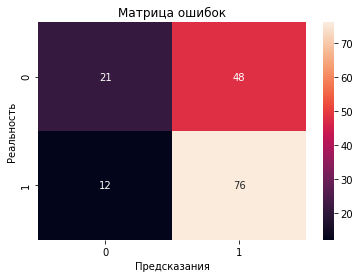

In [141]:
cm = confusion_matrix(y_test_mol, predictions_mol)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.ylabel('Реальность')
plt.xlabel('Предсказания')
plt.show()

In [142]:
cm 

array([[21, 48],
       [12, 76]])

Выводы по матрице ошибок: 
1. модель ошибочно предсказывает, что молоко будет вкусным (а на самом деле невкусным) 48 раз, это False Positive - ошибка первого рода
2. модель ошибно предсказывает, что молоко будет невкусным (а на самом деле вкусным) 12 раз, это False Negative - ошибка второго рода
Согласно заданию, главное для заказчика — вкусное молоко, значит для дальнейшего анализа более важными (критичными) являются ошибки False Positive (первого рода). За нее отвечает метрика precision, которая составляет 61%, то есть в 39% модель ошибается. 

Поскольку данная ошибка (ошибка первого рода) для нас является критичной, необходимо свести её к нулю. 

Для того, чтобы свести критичную для нас ошибку к 0, необходимо изменить значение порога

Для каждой коровы получим вероятность принадлежности к классам

In [143]:
y_pred_proba = model_lr_mol.predict_proba(X_test_mol)[:,1]
y_pred_proba

array([0.66601944, 0.70846647, 0.63129578, 0.4775925 , 0.78647697,
       0.5572486 , 0.71485911, 0.66484899, 0.78423935, 0.5197624 ,
       0.72522736, 0.68811034, 0.70679958, 0.83943817, 0.7929133 ,
       0.5550763 , 0.69872606, 0.7300009 , 0.78594472, 0.7632515 ,
       0.66682486, 0.58922559, 0.39730321, 0.35804966, 0.60993098,
       0.8015288 , 0.37291096, 0.59949362, 0.5759143 , 0.56360588,
       0.52006726, 0.50163064, 0.5546757 , 0.58581665, 0.72973428,
       0.72744869, 0.52022857, 0.71383562, 0.44019442, 0.84345134,
       0.33254503, 0.58625032, 0.54793427, 0.67508111, 0.42399975,
       0.69234686, 0.32531827, 0.32579575, 0.44882373, 0.46791013,
       0.66295917, 0.78765757, 0.56389126, 0.58679772, 0.81216864,
       0.56806933, 0.73355578, 0.71628562, 0.62692151, 0.60997586,
       0.57203089, 0.65607471, 0.60657689, 0.49142564, 0.7499497 ,
       0.66051415, 0.78581706, 0.43913645, 0.3277591 , 0.79166011,
       0.50632779, 0.53475022, 0.65103091, 0.55678819, 0.55348

Создадим список порогов

In [144]:
porogs = [round(i,2) for i in np.linspace(0.1,1,num = 5,endpoint=False)]
print(porogs)

[0.1, 0.28, 0.46, 0.64, 0.82]


Зададим новый порог 0.82

In [145]:
#установим новый порок 0.82
new_porogs = 0.82
y_pred_new = (y_pred_proba >= new_porogs).astype(int)
#рассчитаем значения метрик recall, и accuracy
accuracy = accuracy_score(y_test_mol, y_pred_new)
recall = recall_score(y_test_mol, y_pred_new)
precision = precision_score(y_test_mol, y_pred_new, zero_division=0)

In [146]:
# выведем на экран метрики recall и precision
print("Значение метрики Accuracy =", accuracy)
print("Значение метрики Recall =", recall)
print("Значение метрики Precision =", precision)

Значение метрики Accuracy = 0.4840764331210191
Значение метрики Recall = 0.07954545454545454
Значение метрики Precision = 1.0


Значение метрики Precision = 1.0, значит мы добились нужного нам результата. Теперь снова построим матрицу ошибок

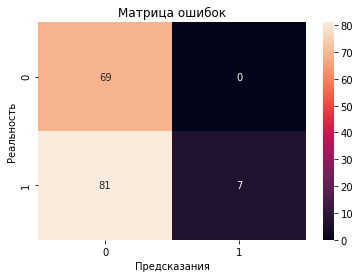

In [147]:
cm_new = confusion_matrix(y_test_mol, y_pred_new)
sns.heatmap(cm_new, annot=True, fmt='d')
plt.title('Матрица ошибок')
plt.ylabel('Реальность')
plt.xlabel('Предсказания')
plt.show()

In [148]:
cm_new

array([[69,  0],
       [81,  7]])

Выводы:
1. Критическую ошибку первого рода (False Positive) снизили до 0
2. Вычислили новое пороговое значение 0.82
3. Значение метрики Recall снизилось до 0.078
4. Значение метрики Accuracy снизилось дл 0.48
5. Значение метрики Precision (точность) стала равной 1, то есть объекты классифицируются как "вкусное молоко" в случае если модель уверенна в своем предсказании на 0.82

Далее необходимо сделать прогноз по вкусу молока для всех коров

In [149]:
X_train = ferma_main
X_test = cow_buy

In [150]:
target = 'вкус_молока'
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_бин', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
clf = LogisticRegression()
clf = clf.fit(X, y)

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names_out()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1) 

y_pred = clf.predict_proba(X_cow)[:,1] 

cow_buy['y_pred'] = y_pred

cow_buy = cow_buy.sort_values(by = ['y_pred'], ascending = False)
cow_buy = cow_buy.drop(columns='y_pred') 

display(cow_buy)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_в_квадрате,спо_бин,сырой_протеин_г,удой_кг,id,эке,спо,вкус_молока
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,223.599841,1.0,2019.947532,6117.904294,20,14.3,0.895,вкусно
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,6121.160300,1,14.2,0.890,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,6121.160300,7,13.2,0.885,вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,223.599841,1.0,2019.947532,5900.094096,2,12.8,0.890,вкусно
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,1.0,2019.947532,5887.494911,3,14.0,0.885,не вкусно
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,223.599841,1.0,2019.947532,6131.143082,4,12.4,0.885,не вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,1.0,2019.947532,6131.143082,5,12.8,0.885,вкусно
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,223.599841,1.0,2019.947532,5913.332884,10,13.4,0.895,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,223.599841,1.0,2019.947532,5889.420153,18,12.4,0.895,вкусно
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,223.599841,1.0,2019.947532,5889.420153,11,13.7,0.895,вкусно


Шаг 7. Итоговые выводы

Отберем коров для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко

In [151]:
cow_buy.sort_values(by = ['удой_кг'], ascending = False).loc[(cow_buy['удой_кг'] >= 6000) & 
                                                             (cow_buy['вкус_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,эке_в_квадрате,спо_бин,сырой_протеин_г,удой_кг,id,эке,спо,вкус_молока
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,223.599841,0.0,2019.947532,6552.076932,12,16.5,0.930,вкусно
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,0.0,2019.947532,6507.712055,21,15.5,0.930,вкусно
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,223.599841,0.0,2019.947532,6507.712055,16,15.6,0.930,вкусно
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,223.599841,0.0,2019.947532,6497.729273,13,15.4,0.930,вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,223.599841,0.0,2019.947532,6494.473267,8,14.7,0.930,вкусно
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,223.599841,0.0,2019.947532,6264.063884,9,14.2,0.940,вкусно
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,223.599841,1.0,2019.947532,6131.143082,5,12.8,0.885,вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,6121.160300,7,13.2,0.885,вкусно
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,223.599841,1.0,2019.947532,6121.160300,1,14.2,0.890,вкусно
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,223.599841,1.0,2019.947532,6117.904294,20,14.3,0.895,вкусно


Под требования фермера подходит 10 коров (удой больше 6000кг и вкусное молоко)
Для прогноза удоя была выбрана лучшая модель логистическрой регрессии (третья): 
MSE третьей модели равно 35736.03173609137
MAE третьей модели равно 189.03976231494624
RMSE третьей модели равно 146.30325279856768 
При создании модели логичтической регрессии учли ошибку первого рода, чтобы модель не относила коров с невкусным молоком к тем, у которых молоко вкусное. Значение метрики Precision (точность) стала равной 1, то есть объекты классифицируются как "вкусное молоко" в случае если модель уверенна в своем предсказании на 0.82. 
Выводы о моделях логистической регресии:
1. Для улучшения качества регрессионной модели выполняли преобразование признаков, преобразовывали количественные признаки в категориальные
2. Изменяли порог классификации, чтобы снизить ошибку первого рода, когда невкусное молоко ошибочно классифицируется как вкусное
Возможно и использование других методов для улучшения качества модели, к примеру, устранить выбросы, однако в данной задаче с ними надо быть осторожнее, возможно они могут повлиять на результат. Также для улучшения регрессионной модели можно использовать регуляризацию, подбор оптимальных гиперпараметров или более сложных методов.
При анализе рисков и экономических расчетов выделим следующие важные метрики:
Точность (Accuracy)
Полнота (Recall) и специфичность (Specificity)
Положительное прогностическое значение (Positive predictive value) и отрицательное прогностическое значение (Negative predictive value)
F-мера (F1-score)
и друние метрики в зависимости от поставленной задачи.